In [1]:
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install ipython-sql prettytable 
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install numpy
!pip3 install scipy
!pip3 install scikit-learn

!pip3 install ipython-sql


import prettytable

prettytable.DEFAULT = 'DEFAULT'

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

con = sqlite3.connect('data.db')

cursor = con.cursor()




In [3]:
# import chicago socioeconomic census data 
chicago_census_data = pd.read_csv ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_census_data.to_sql("CHICAGO_CENSUS_DATA", con, if_exists='replace', index=False, method="multi")


78

In [4]:
#chicago public school data
chicago_public_schools = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_public_schools.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False)


566

In [5]:
# chicago crime data
chicago_crime_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01')
chicago_crime_data.to_sql("CHICAGO_CRIME_DATA", con, if_exists='replace', index=False)



533

# **Predictive Modeling**

### Sklearn, Predictive Modeling, Model Evaluation, Feature Importance Evaluation, Visualization

Model Performance:
Mean Squared Error: 62.26
R² Score: 0.91


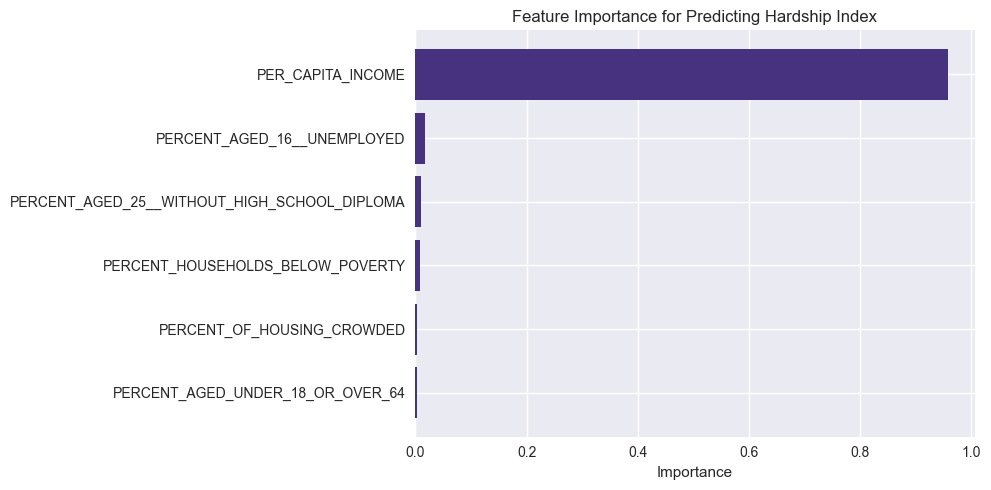

In [8]:
# Model for predicting hardship index based on other factors

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

conn = sqlite3.connect('FinalDB.db')
df = pd.read_sql_query("SELECT * FROM Chicago_Census_Data WHERE COMMUNITY_AREA_NAME != 'CHICAGO'", conn)
conn.close()




X = df[['PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
        'PERCENT_AGED_16__UNEMPLOYED', 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
        'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME']]
y = df['HARDSHIP_INDEX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# making a prediction
y_pred = model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance for Predicting Hardship Index')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()